<a href="https://colab.research.google.com/github/BlazeIngithub/BlazeIngithub/blob/main/ann_fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [26]:
#set random seed for reproduceability
torch.manual_seed(42)

In [27]:
df= pd.read_csv("/content/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


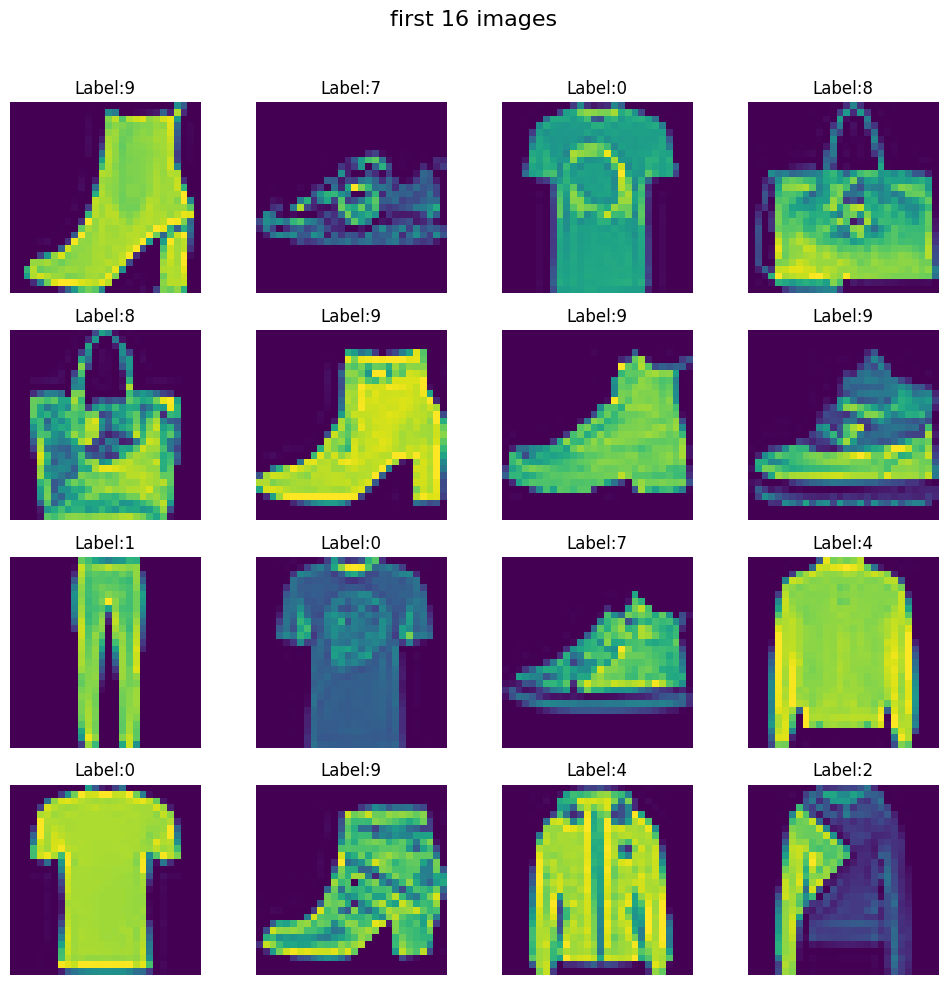

In [28]:
#create a 4X4 grid of images

fig, axes =  plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("first 16 images", fontsize=16)


#Plot the first 16 image from the the dataset

for i, ax in enumerate(axes.flat):
  im= df.iloc[i, 1:].values.reshape(28, 28) #Reshape to 28X28
  ax.imshow(im) #display in grey scale
  ax.axis("off")
  ax.set_title(f"Label:{df.iloc[i,0]}") #show the label

plt.tight_layout(rect=[0, 0, 1, 0.96]) #adjut layout to fit the title

plt.show()


In [29]:
# train test split

X= df.iloc[:, 1:].values
y= df.iloc[:, 0].values





In [30]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

In [31]:
#scalin the feature

X_train= X_train/255.0
X_test= X_test/255.0

In [32]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [33]:
#Create custom dataset class

class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features=torch.tensor(features, dtype= torch.float32)
    self.labels= torch.tensor(labels, dtype= torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]












In [34]:
#Create dataset object
# create train dataset object

train_dataset= CustomDataset(X_train, y_train)


In [35]:
len(train_dataset)

4800

In [36]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [37]:
#create test_data set

test_dataset= CustomDataset(X_test, y_test)

In [38]:
len(test_dataset)

1200

In [39]:
#create train and test loader

train_loader= DataLoader(train_dataset, batch_size=32, shuffle= True)
test_loader= DataLoader(test_dataset, batch_size=32, shuffle=False)




In [40]:
#Creae NN class

class MyNN(nn.Module):
  def __init__(self, num_features):

    super().__init__()
    self.model= nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 10)
    )


  def forward(self, x):
    return self.model(x)

In [41]:
# set learning rate and epoch

epochs = 100
learning_rate= 0.1



In [42]:
#instatiate the model

model= MyNN(X_train.shape[1])

#loss function
criterion= nn.CrossEntropyLoss()

#optimizer
optimizer= optim.SGD(model.parameters(), lr= learning_rate, weight_decay=1e-4)




In [43]:
len(train_loader)

150

In [44]:
#trainng Loop
for epoch in range(epochs):

  total_epoch_loss= 0
  for batch_features, batch_labels in train_loader:

    #forward pass
    outputs= model(batch_features)

    #calculate loss
    loss= criterion(outputs, batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()

    total_epoch_loss= total_epoch_loss + loss.item()

  avg_loss= total_epoch_loss/len(train_loader)
  print(f"Epoch: {epoch + 1}, Loss: {avg_loss}")


Epoch: 1, Loss: 0.9859934993584951
Epoch: 2, Loss: 0.6981297681728998
Epoch: 3, Loss: 0.6334470711151758
Epoch: 4, Loss: 0.5717505387465159
Epoch: 5, Loss: 0.5344807918866475
Epoch: 6, Loss: 0.5051020257671675
Epoch: 7, Loss: 0.4850326011578242
Epoch: 8, Loss: 0.46834743330876033
Epoch: 9, Loss: 0.44999886929988864
Epoch: 10, Loss: 0.4334342787663142
Epoch: 11, Loss: 0.41339338620503746
Epoch: 12, Loss: 0.39739427347977957
Epoch: 13, Loss: 0.3903965451320012
Epoch: 14, Loss: 0.3609650201598803
Epoch: 15, Loss: 0.37131632924079894
Epoch: 16, Loss: 0.34414006729920704
Epoch: 17, Loss: 0.3439714426298936
Epoch: 18, Loss: 0.3453372099002202
Epoch: 19, Loss: 0.3273297596971194
Epoch: 20, Loss: 0.3222242423892021
Epoch: 21, Loss: 0.30941043203075724
Epoch: 22, Loss: 0.311665343940258
Epoch: 23, Loss: 0.3006267509361108
Epoch: 24, Loss: 0.2845372232298056
Epoch: 25, Loss: 0.2858426795403163
Epoch: 26, Loss: 0.28151323785384497
Epoch: 27, Loss: 0.2658964444200198
Epoch: 28, Loss: 0.27274056742

In [45]:
##set model to eval mode

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [46]:
#Evaluation code on test data

total= 0
correct= 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs= model(batch_features)
    _, predicted = torch.max(outputs, 1)

    total= total + batch_labels.shape[0]

    correct= correct + (predicted== batch_labels).sum().item()

  print(correct/total)

0.8316666666666667


In [47]:
#Evaluation code on training data

total= 0
correct= 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    outputs= model(batch_features)
    _, predicted = torch.max(outputs, 1)

    total= total + batch_labels.shape[0]

    correct= correct + (predicted== batch_labels).sum().item()

  print(correct/total)

0.9922916666666667
